# Analyzing and Predicinting Car Price with Machine Learning Using Python

### Importing needed packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as XGRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns



In [2]:
df = pd.read_csv(r'C:\Users\Bora\Management Of RBR\RBR Builds - Documents\RBR Analytics\ML Test\Car Sale Data\cardata.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape
# this tells you the numbe of columns and rows

(301, 9)

In [4]:
df.info()
# this gives yu information about the data such data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()
#This gives some statistical information about the data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Let's now see if there's any null 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Data Processing

In [7]:
# We need to add an Age column and deleted the Year column
df['Age'] = 2024 - df['Year']
df.drop('Year', axis = 1, inplace = True)
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [8]:
# Let's now rename some columns
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(Lacs)','Owner':'Previous_Owner'}, inplace = True)

In [9]:
df.head()

,Car_Name,Selling_Price(lacs),Present_Price(Lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Previous_Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


# Exploratory Data Analysis (EDA)

In [10]:
# Let's look at the column names again
df.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(Lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Previous_Owner', 'Age'],
      dtype='object')

In [11]:
# how many columns?
df.shape

(301, 9)

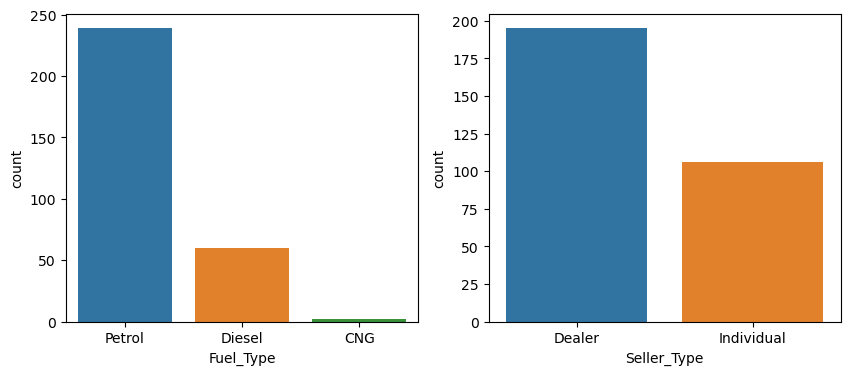

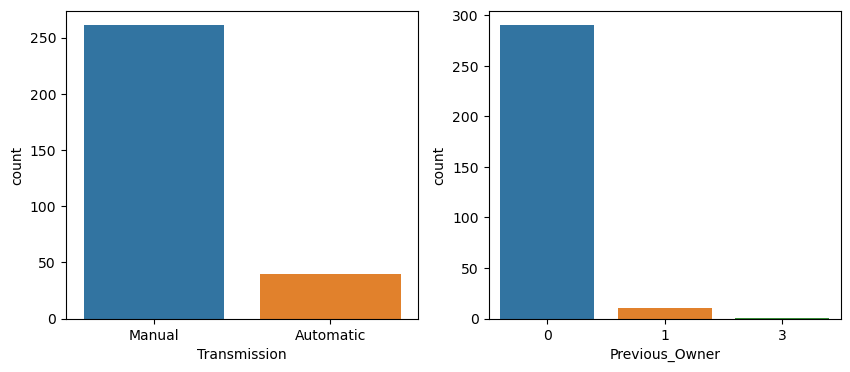

In [12]:
#Let's create a bar chart for some of the columns

cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Previous_Owner']
i=0
while i <4:
    fig = plt.figure(figsize = [10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data = df)
    i += 1

    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data = df)
    i += 1

    plt.show()

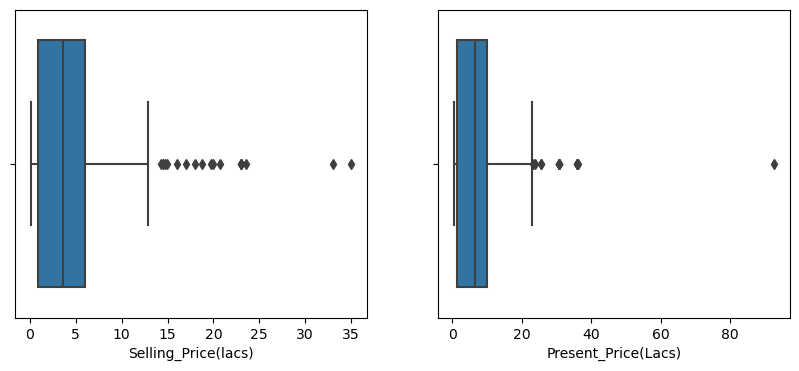

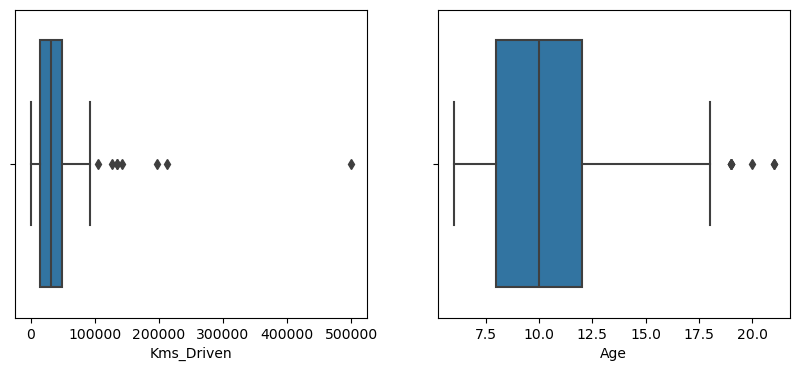

In [13]:
num_cols = ['Selling_Price(lacs)', 'Present_Price(Lacs)', 'Kms_Driven', 'Age']

i=0
while i <4:
    fig =plt.figure(figsize =[10,4])

    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data = df)
    i += 1

    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data =df)
    i += 1

    plt.show()

In [14]:
df[df['Present_Price(Lacs)'] > df['Present_Price(Lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(Lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Previous_Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


In [15]:
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(Lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Previous_Owner,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,19
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,14
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,16


In [16]:
sns.heatmap(df.corr(), annot=True, cmap= "Blues")
plt.show()

ValueError: could not convert string to float: 'ritz'

In [ ]:
# Let's looks at how the correlations are
df.corr()

,Selling_Price(lacs),Present_Price(Lacs),Kms_Driven,Previous_Owner,Age
Selling_Price(lacs),1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price(Lacs),0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Previous_Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,0.182104,1.000000


In [ ]:
#Lets create a Pivot table 
df.pivot_table(values = 'Selling_Price(lacs)', index = 'Seller_Type', columns= 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [ ]:
df.pivot_table(values= 'Selling_Price(lacs)', index = 'Seller_Type', columns = 'Transmission')

Transmission,Automatic,Manual
Seller_Type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


# Data Preparation 
#### For Machine Learning

In [ ]:
df.head()

,Car_Name,Selling_Price(lacs),Present_Price(Lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Previous_Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [ ]:
df.drop(columns = 'Car_Name', axis =1, inplace =True)

In [ ]:
df.head()

,Selling_Price(lacs),Present_Price(Lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Previous_Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [17]:
df = pd.get_dummies(data = df,drop_first=True)

In [18]:
df.head()

,Selling_Price(lacs),Present_Price(Lacs),Kms_Driven,Previous_Owner,Age,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,4.75,9.54,43000,0,11,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,7.25,9.85,6900,0,7,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2.85,4.15,5200,0,13,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,4.60,6.87,42450,0,10,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


# Train Test Split

In [19]:
X = df.drop(columns = 'Selling_Price(lacs)', axis = 1)
Y = df['Selling_Price(lacs)']

In [20]:
X.shape, Y.shape

((301, 105), (301,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 105)
x test:  (61, 105)
y train:  (240,)
y test:  (61,)


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
x_train_prediction = model.predict(X_train)

In [33]:
from sklearn import metrics

In [34]:
# r2
score_1_train = metrics.r2_score(y_train, x_train_prediction)

In [35]:
score_1_train

0.9426732426518523

In [36]:
# MAE (mean absolute Error)
score_2_train = metrics.mean_absolute_error(y_train, x_train_prediction)
print('Score 2 training Set MAE: ', score_2_train)

Score 2 training Set MAE:  0.7068991860336454


The R-squared (R²) value, also known as the coefficient of determination, is a statistical measure that indicates how well the regression predictions approximate the real data points. It ranges from 0 to 1, with higher values indicating better fit. However, what constitutes a "good" R-squared value depends on the specific context and the field of study.

Understanding R-squared Values
R² = 0: The model does not explain any of the variability of the response data around its mean. R² = 1: The model explains all the variability of the response data around its mean. 0 < R² < 1: The model explains a proportion of the variability.\

General Guidelines for R-squared Values
High R-squared (0.75 - 1): Indicates a strong correlation and that the model explains a large portion of the variance. This is often expected in physical sciences where the relationships between variables are more deterministic.

Moderate R-squared (0.50 - 0.75): Indicates a moderate correlation and that the model explains a reasonable amount of variance. This might be acceptable in social sciences where the relationships between variables can be more complex and less predictable.

Low R-squared (0.30 - 0.50): Indicates a weak correlation and that the model does not explain a large portion of the variance. This might still be acceptable in fields where many unaccounted-for variables influence the outcome, such as in certain biological or economic models.

Very Low R-squared (0 - 0.30): Indicates a very weak correlation. This suggests that the model is not capturing much of the variability in the data and might not be a good predictor.

Factors Influencing the Interpretation of R-squared
Field of Study: Different fields have different standards. For example, in psychology or sociology, an R-squared value around 0.30 might be considered very good, whereas in engineering, you might expect R-squared values to be closer to 0.90. Complexity of the Model: A higher R-squared value doesn't always mean a better model. Overfitting can occur when the model is too complex, capturing noise instead of the underlying pattern.

Purpose of the Model: For predictive modeling, a high R-squared is desirable. For exploratory research or identifying potential predictors, a lower R-squared might be acceptable.

Adjusted R-squared: It is often more useful than R-squared as it adjusts for the number of predictors in the model. This can prevent overestimation of the goodness of fit in models with many variables.

Conclusion
A "good" R-squared value is context-dependent:

In controlled experiments with few sources of variability, you might expect R-squared values closer to 1. In observational studies with many confounding variables, lower R-squared values might be the norm. Always consider the context, field standards, and purpose of your model when evaluating the goodness of fit using R-squared.

The Mean Absolute Error (MAE) is a measure of prediction accuracy in regression models, representing the average absolute difference between predicted and actual values. Like any metric, what constitutes a "good" MAE depends on the context of the problem, the scale of the data, and the field of study.

Factors Influencing Interpretation of MAE
Scale of Data: The MAE value is in the same unit as the data being predicted. For example, in a dataset where values range from 1 to 1000, an MAE of 10 might be excellent. In contrast, for a dataset where values range from 1 to 10, an MAE of 10 would be very poor.

Field of Study: Different fields have different standards. For example:

Finance: Small errors might be critical, so a lower MAE is desirable.

Weather Forecasting: Slightly larger errors might be acceptable given the inherent uncertainty.

Medical Diagnosis: The tolerance for error might be very low.
Comparative Performance: The MAE should be compared to the MAE of other models on the same dataset. A "good" MAE is often relative and should be seen in comparison with other benchmarks or existing models. Baseline Models: Comparing the MAE against a baseline model (e.g., mean prediction) can give insight into the performance. If your model's MAE is significantly lower than that of the baseline, it is considered good.

Guidelines for Good MAE
Context-Dependent Benchmarks: A good practice is to look at industry standards or literature for benchmarks specific to your field.

Relative Improvement: Consider the relative improvement over simpler models or previous models. An MAE reduction by a significant percentage can be considered good.

Data Characteristics: Understand the distribution and variance in your data. A model performing well on high variance data with a low MAE is noteworthy.

Examples
House Price Prediction:
Dataset range: $100,000 to $1,000,000.

A good MAE might be $10,000 or lower.
Stock Price Prediction:
Daily price range: $100 to $200.

A good MAE might be $1 to $5.
Temperature Prediction:
Daily temperature range: -30°C to 50°C.

A good MAE might be 1°C to 2°C.
Conclusion
A "good" MAE is highly context-specific:

Consider the scale and range of your data.

Look at industry benchmarks and standards.

Compare against baseline models and relative improvements.

Evaluate the MAE in the context of the specific application and tolerance for errors.

Always interpret MAE within the broader context of your predictive task and field-specific requirements.

Now we need to run the accuracy on the testing data

In [37]:
x_test_prediction = model.predict(X_test)
score_1_test = metrics.r2_score(y_test, x_test_prediction )
score_2_test = metrics.mean_absolute_error(y_test, x_test_prediction)
print('Score 1 Test R Square: ', score_1_test)
print('Score 2 Test MAE (Mean Squared Error): ', score_2_test)

Score 1 Test R Square:  0.4565163427746233
Score 2 Test MAE (Mean Squared Error):  2.1481720080084528
